In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
df = pd.read_csv('Iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [23]:
species_name = le.classes_

In [7]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [8]:
X = df.drop(columns=['Id','Species'])

In [10]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y = df['Species']

In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.25,shuffle=True,random_state=7)

In [16]:
se = StandardScaler()
X_train = se.fit_transform(X_train)
X_test = se.transform(X_test)

In [17]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [18]:
prediction = model.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

Accuracy: 0.9203539823008849


In [20]:
cm = confusion_matrix(y_test,prediction)
cm

array([[38,  0,  0],
       [ 0, 30,  6],
       [ 0,  3, 36]], dtype=int64)

Text(50.72222222222221, 0.5, 'Actual')

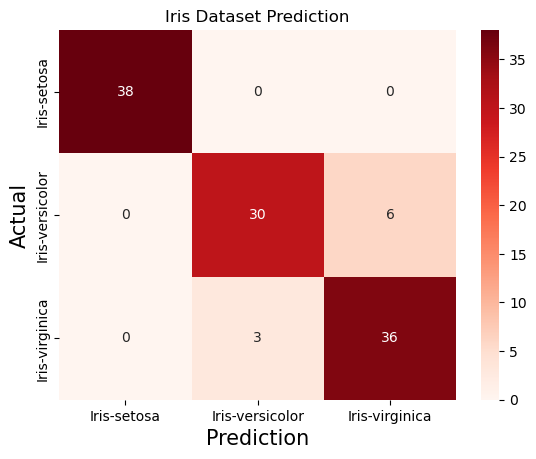

In [24]:
ax = sns.heatmap(cm,annot=True, fmt='d',cmap='Reds',xticklabels=species_name,yticklabels=species_name)
ax.set_title("Iris Dataset Prediction")
ax.set_xlabel('Prediction',fontsize=15)
ax.set_ylabel('Actual',fontsize=15)